<a href="https://colab.research.google.com/github/aldysptr28/Pengolahan_Citra_Digital/blob/main/pcd_aritmatika___logical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# library
import urllib.request
import cv2 # https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# get image from link google image

# first Image
urllib.request.urlretrieve(
'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMREBITEhEVFhUVFhoSFxUVFxgVGBoaFhYXGxgVGBYYHSggGBolHRcWIjEhJSkrLjAvFyAzODMtNygtLisBCgoKDQ0ODw8NFS0dFRkrLSsrKys3KzctKzcrNysrLS03KysrKystNzctKysrKy03LS03LSstNysrLTcrNy03K//AABEIALEBHAMBIgACEQEDEQH/xAAbAAEAAgMBAQAAAAAAAAAAAAAABAUCAwYBB//EAEMQAAIBAgMEBwUFBgQGAwAAAAECAAMRBBIhBTFBURMiMmFxgZFCUqGxwQYjYnKCFTNTkqLRFCRz8DRDY8LS4XSTsv/EABUBAQEAAAAAAAAAAAAAAAAAAAAB/8QAFhEBAQEAAAAAAAAAAAAAAAAAABEB/9oADAMBAAIRAxEAPwD4bERAREQEREBERAREQEREBERAREm4DZj1bGxC+9bTlpzN9IEKT6WCBUb7sLgjcNOMsKeyqSqCxLDfnOi8LXyk2GvPWx3TTiAQ6hLCnpmsFZVzGxLkEg3AB1O4wKh1sSORtMZ0Q2dSf2bHjkN8uhOtiQN2mutwLDUyBitjOoul3GoNgLi3gTfcfSBWREQEREBERAREQEREBERA9nsxnsDIGeEzy8SQeREShERAREQEREBERAREQEm7P2c1Ug7k1u2nAXIAJGY7vUTVgMMatRU1sSLkcFvqdeQnTFhTXKoChd4DFjqCdVBuSWcjK2/foAYEYbNoIp0zdq5ZrHq3FhqLara+U6nlv34l1RbdlVUi4I0AsEIFyWJIJU3HtEz3ChrXenUF9EvdqtgLEljqSQ5sBYDKTw1sdn4Cm6ZqiqxLMd5ZdOoDr2jZRqeZ5yDkcRtZy11svC+hfzci/kLDul3s2qzLRLVQSbXuASfvGG8kHcANx3cN86ZKajQKB4ACVONrJ0y9W+4Zhk9k3OUE5mtvOXdrv3QORG06l+swcX3OM3oTqPK0usDjRU1F73swYjq3By7xdlvqNQQ1rnUGdWApAtYg+BEiV9l0mzdRQSpUleroRbW2/wA+UChOApOzAoAWOutmBYAgWL2U3Yi3WF1OvKqxuybAPSOdSM3C9gL3A0JFu7gZdqGemCEu9sw0LLuuVQ30HUA0IykjnMMPiSBdgwtcstViCCbFQS2hBK2Dndu5XDk4lnt3ACkwKCyMOdwCCdNdd1jrzlZKEREBERAREQEREBERAREQEREBERAREQEREBERAREQLr7NrYu+ulkA01JuwtfeboNO8TqNjUgEZjl35QRuCoLAXJJ063E7zOY2N1qTKti4Ystxmy3AAbLY3GhF7GxsZZu+ShVSo4zMgWwBXrlm6xuAFXVLncbHnrBY7bclUCqGRicxsXAIBKEgXuua1/CQ9iJVzp11NgxqZdAQwHR9UWDNcHrW3aX0tIqYhqadFg3arvuSmi33kPoB538Z5iA1RFW9OmqAIOiD1nFvZLJp5XgWOG2jV6dzUIFDMyK2gF1OnW79Rc6X3SANnqpDKc4okWqDcMzk6gX6TISWNiN81hgaJBrViigrlASndUsGsNdBcXvNuC2eTSzU+mC7wP8AEKL+AC2HmRAkVaj0qFOlhXFRl6zEWbq6m/IXJ0G+b9ou706LhlyFbvYmxZ0smntrmOq8eRlVs8Kqt0dStTsTpmptdgtzYCwJsIwQZWNRKge5z/fU3RRfUsCLqp13wJ2wukWoAQDmDdI6rYWW2QZgAC183ke6W+NQVKTgWOhsdDYjUehA9JQU8bVTMHGSgxJz0x0uXNvswNgCSTqDa8YHoqdOtTp1bhmRg2uqG11uo6r6OLaHd5Bp2sufDHmpFTTc1yLkXYm16h103HSc1Omr0TTp1mqBBcFaZVchswPVtYXv1dDqNTOZlCIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiIHoNt0m7Px5QhX61MkBka5W1wbgcDpIMsaezggD4higOoQa1G77HsjvMC6x1LMj0ydL9QkZFN8pXIAbGwuCApJ+WxXqJSyPUCLbTRaHiATd/6AZR1Nrt2aK9GOyLXLkcAXOvkLTEbKqnrVCKYPtVWyk+R6x9JBP6bDopUVBYm7KBVcE/zoD6cJiMfhgCMhsd9qa2PrUkL/DYde1XZu6nT+rkR/lf+v8A0QJ9PFYfrAPkDaMMlRb+OSqR8JNwFXKpWhVBB3KGWpbwSoEYeAJlH0OGbdVqJ+dAw/paP2SW/dVKdTuVrN/I1jAtsNRakaje2bmyAo1rHQU9LdaxvYi3xh7axhpt0dNgDYdI6DIWbXeF0A14SKm0K1LqOCQPYqgkDwvqvlaZnD06+tIlKh16NzcMfwOePc3rKKwsTxnkzq0yrFWBBGhB0MwgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAnqi5sN5nktMP/l6Yqn964+7B9leNQjmeHrAyKrhRqA1ffY6rS8eb/KaMPg3rE1Kj5Vv1qjXNzyUb2buEz2bgek+8qXK5rADtVHPsL9TwkzaO0ejIC5TUUZbjsUh7lMe9zaBvOHampFBVRwM1mIauV4m25PyjWc5UqFjdiSTvJNz6mZq7qRUuwJOYNrqQdSDx1lhXpjEKalMAVQL1KY9rnUQfMQKqJuoYZ37CM35VJ+UlDYmI/gt8IFfEkV8DVTt03XvKkD1kjBYVQvTVuwDZV3Gow4DkvM+W+BPwBqPTHTMjIxtTWsbFueR96+O7hIuO2TbMaebq6tTYWqIOf41/EJCxNd6z3IubaKo0CjgoG4ASZs/adsq1CbL2Kg7dPw95eamB5Qxa1gKdc67krcV5K/vL8RIWLwzUnKOLEehHAg8QZb7U2fnu6gBwM7KvZdf4tPu5jhI2DcV0FBz1h+5Y8/4ZPI8ORgVcT1lIJBFiNCDPICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiBM2XhhUfr9hAXc/hHDxJsPObBmxVe5NgdSeCIo+QAmT/d4VR7VZsx/Ihso82ufKTNkYcLSu26pd3PKjS1I/U1h5QMtoYsUkXIMrMuWkP4dI+3/qPvvymn7O7F6ds76Uwf5jyHdzP+xEpq2KxHe7a/hH9gB8J9Bw9BaaKiiwUWAkEbH7Np1aXRkAADqkC2W3Lu7p8/JNKp1HF0OjqdNOIPKX32o20WJo0z1Ro5HE8V8Pn84+xvs61Zc7kopHV01Pfbl84ECrtGvVNs7n8KaD+VZidm1zr0NXxyN/ae16VXC1rXKuuoI4jmOYMsOlSqemNVkA1qUwxzE8Oj7m/plFcmLr0jo9Re4kgeanQzVjMW9Vszm5tYcAAOAA0E34zF1MTUGhPsogubDgBfeeZm+rskWK06geqgu6D45D7RHEQNtcnConRdpwGNYag/gQ8AOPE+E016a10aogC1FF6iDQEfxFHDvHnNOzsWFvTqXNJ+0OKng68mHxior4Wvv6yHfwII5ciDu74EnYuLJK0ibEHNSc+y/un8DbiO+atrYYKRUQZQxIKj2Ki9pO6x1HdNe1KAVg6dioM6d3NfFTcektkP+Ip676oynur0hdW7s66GBXbS+9prXG8nJU/OBo36h8QZWSy2L1meid1Vco7nXVD6i3nK4iB5ERAREQEREBERAREQEREBERAREQEREBETfgFvVpjm6j1YQJe3dKwpj/lqtIeSi/xJlhtc9HSqKOaYYeFNcz+rGQe3jvGv8M/9ps2490pfies/rUI/7YGewcQuHRq7LmuwogDfa2Zz6BZ0e19qquGNWmwOfqoRzP1Av6TksbphsOOfSOf5goPosYrTC0B7zVHPiCqj5GQZfZ/Z3T1gD2V6zeHAeZ+s+gAW3TnfsVRtSqNxZ7eSj/2Z0caIO1tmLiEytoRqrcQfqO6cFisC9Op0bKc17ADW99xXnefS5g1BSysVBZb2JGovvsYHG4rBPg6IIXr1NGqD2AfYXkTxbyEo6VQqwZTYg3BHAifTq1IMpVhcEWIM4Tb2xjh2uLmmToeX4T3wM6u0aQ+9pp98w1uOqjcWUcSd/deVDuSSSSSdSTqTMYlFjR+8wrrxpMKi/lfqsPC+UzZsaqctVRvUCuv5qRB+RM17E1eovvUai/05h8VEfZ//AIhBwYMp80YQG1PusUzLuzCqv6rOPnMNt0wuIqAbicw8HAYfOZ7Y1FA86K/AsPoI21qaJ50aZPkLfSBXREQEREBERAREQEREBERAREQEREBERASTs02rUv8AUX/9CRpkjWII3g39IFlQOXHDur2/rtMtsranR7ulX0qt/ea9sHJimZeLCqP1AN9ZO27Tuj29itnH5K6hgfUWkEDaGtDDH8Lr6Of7xi9cLhyPZaoh8bqw+BntPr4RhxpPn/S4sf6gPWMAOko1aXtC1ZB3qLMPHKb/AKZRZbE2p0GHVrXUVSrgb7MoIYehnW0aquoZTdSLgifPtk1FOek5stUBbngwN0J7r6eclbH2o+EqGnUBy3sy8VPMf71kF/8AbA/5b9a/Izldm7Pq4jN0Z7Nr3a2+9vlOm+1lUNhQykEFlII8DOe2Jtj/AA2fqZs1uNrWv3d8C02VsGvTrU3a2VTc9a/wnUV6KupVhdSLEGUOzftMa1VKfRAZja+a/AndadEIHz/bmyGw780bst/2nv8AnKufUMTQWopRxdToR/vjOB23shsO/ND2W+h74Hmw9KjN7tKo39B/vH2f/wCJp91z6KTGC6lCtU4tagv6jmb4D4z3Ywt0z+5SYD8z9RfPU+ko82t2cOP+iD6sxjbP/I/0E+Nz9Y25++yDXo1SkP0qL/G8beP37LwQLTH6VAPxvAroiICIiAiIgIiICIiAiIgIiICIiAiIgIiIFlj+vQoVPdBot4rqvqp+EsMG4q0kudGX/Cv3MOtRb6eUrtkMGz0GNhVHVJ4OuqHz1HnPNmVQjvSqaI/Ub8JB6reKn6wMMBW6GqQ401p1F7jow8Rv8orI2GrAqeyQ6NwZTuPeCPrJm1cMzhnI+9p2SsBx92qOYItf/wBzDG9TDrSq61L5lHGmp4MeN/d4fCBq2jhgQK1IfdsdQPYbih7uR5T1MUlZQtYkMBZaoF9OCuOI798jYHGtSYkWKkWZDqrDkR9ZLOAStrh2140XNmH5WOjj4wN9bDvTwbhmDL0ilSrZlOjXtym37J4CnW6XpEzZcttSN+a+7wEpK1N0JVgyniDcfCbcFtCpRv0b5c1r6A7r23jvMDuqWycPSIqBApXXMSdPU2lRtr7TAApQNzuL8B+Xme+c3WxNWsQGZ3PAan0EtNm/ZmrUINT7te/tHwHDzkFn9k9qPUvScFgouH5Dkx+Uv8Vh1qIUcXU7/wC45GY4LBpSQIi2HxJ5k8TMNp0HqUnWm2ViLA/TuvuvA4Xa9ZbrSpm9OncA+8xPWb6eAljsykKdNM3/AMqp+RNKa/qbXzldg9nnO3TAqlLWpwPco723D1krbOJIUodHqEVKgHsgfu6XkNfSURtlfeYjO+5Sazn8vW+JsPOQa1QszMd7EsfEm8sG+5w1vbr2Y91NTp/MdfBZWQEREBERAREQEREBERAREQEREBERAREQERED0GWeNXp06de2thWHwFQDkePf4yrm/B4pqThl8CDqCDvUjiDAtNnYtqgUK2Wugy020s6/wmvpflfwlPWLZjmvmub33343vxk7F4QMprUb5PaX2qZ5HmvJpmuJSuAtY5ag0Fa2h5CoOP5vWBVxJGMwT0j110O5hqrDmGGhkeBbDEM+DqZ2LZaiAXN7XDbrzHZbBaNd8iMVNMDOoYDMWvoZGwe0HpAquWzEEhlVtRu3jvmeI2pUdChyAG18qKt7btQIFlsj7RlHtUC5Dp1FC5e8WGo7p2SOGAIIIIuCNQQeM+Wy7+z22zRORzemT/KTxHdzH+zB3MwrVVRSzEADUkyuxW3KanLTvVc7lp6+rbhKLaW0LG9Yq9QarRXWmh5ufabugb9qbTvaqy6DWjTO9j/Gce6OA4ylwNDpGerVJyL1nPFidyD8RM8o0XxDNUqPZRq9Rtw7hzPJRMMfjA1kQFaSdkcSeLtzY/DdKNWNxRquztx3DgANyjuAmiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiBuwmKakwZDY7u4jiCOI7pONKlX1QilU40ybIx/Ax7P5TKuIFgmIrYcmmw0406gzKe+x+YmWfDVN6vSPNeunjlNiPIma8PtR1XIbOnuVBmA8OK+RmebDPvWpSP4SKi+NjZviYD9mKexiKRH4iaZ9GEfsepzpnv6Wn/wCUfs5D2MTSP58yH4j6x+yT/Gof/asB+yrdqvRX9eY+igx0eGTe71TyUdGvmza/CP2YB2sRRA7mLH0UR0eGTe9SoeSqKa+BLXPwgeVNpORkpKKanTLTvmbxbtNM12etOzYhsvEUl1qHx9wd59Ji21SoIootIbrrq58XOvpaV7G5ud51gSsbjjUAUAJTXsou4d595u8yJEQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQP/9k=', # link from google image
"gambar_1.png")

# Second Image
urllib.request.urlretrieve(
'https://wallpapers.com/images/hd/manchester-united-logo-with-lion-odjbuo2ld2fsre11.jpg', # link from google image
"gambar_2.png")

('gambar_2.png', <http.client.HTTPMessage at 0x79be1b222800>)

In [ ]:
# load image
image_1 = cv2.imread('gambar_1.png',) # cv2.IMREAD_GRAYSCALE
image_2 = cv2.imread('gambar_2.png',)

# Dapatkan resolusi gambar dalam piksel
width, height,channel = image_1.shape
print(f"Resolusi gambar 1: {width}x{height}x{channel} piksel")

# Dapatkan resolusi gambar dalam piksel
width_2, height_2,channel_2 = image_2.shape
print(f"Resolusi gambar 2: {width_2}x{height_2}x{channel_2} piksel")


Resolusi gambar 1: 177x284x3 piksel
Resolusi gambar 2: 1080x1920x3 piksel


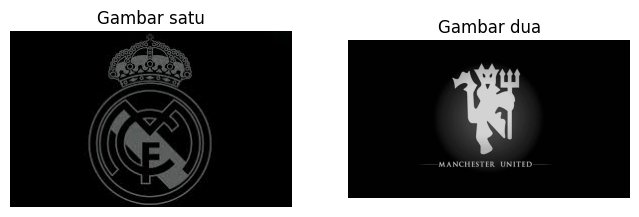

In [ ]:
# plot figure
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
plt.imshow(image_1)
plt.title("Gambar satu")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_2)
plt.title("Gambar dua")
plt.axis('off')

plt.show()

Arithmetic Operations on Images using OpenCV
1. Syntax: cv2.subtract(img1,img2)
2. Syntax: cv2.divide(img1,img2)
3. Syntax: cv2.add(img1,img2)
4. Syntax: cv2.multiply(img1, img2)


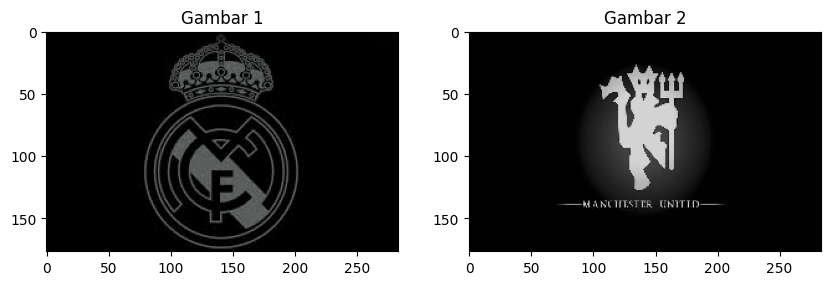

In [ ]:
image_1 = cv2.imread('gambar_1.png')
image_2 = cv2.imread('gambar_2.png')

# Dapatkan dimensi gambar yang lebih kecil
min_height = min(image_1.shape[0], image_2.shape[0])
min_width = min(image_1.shape[1], image_2.shape[1])

# Ubah ukuran kedua gambar
image_1 = cv2.resize(image_1, (min_width, min_height))
image_2 = cv2.resize(image_2, (min_width, min_height))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1) # Changed the subplot index to 1
plt.imshow(image_1, cmap='gray')
plt.title('Gambar 1')

plt.subplot(1, 2, 2) # Changed the subplot index to 2
plt.imshow(image_2, cmap='gray')
plt.title('Gambar 2')

plt.show()

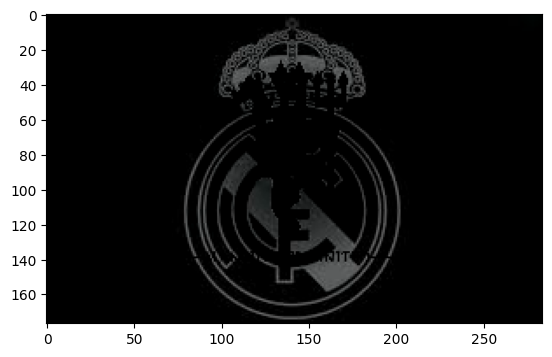

Resolusi gambar 1: 177x284x3 piksel


In [ ]:
# hasil gambar Substract
result_subtract = cv2.subtract(image_1, image_2)
plt.imshow(result_subtract)
plt.show()

# Dapatkan resolusi gambar dalam piksel
width, height,channel = result_subtract.shape
print(f"Resolusi gambar 1: {width}x{height}x{channel} piksel")

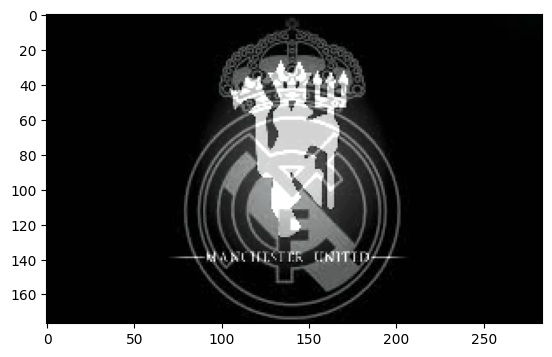

Resolusi gambar 1: 177x284x3 piksel


In [ ]:
# hasil gambar Addition
result_add = cv2.add(image_1, image_2)
plt.imshow(result_add)
plt.show()

# Dapatkan resolusi gambar dalam piksel
width, height,channel = result_add.shape
print(f"Resolusi gambar 1: {width}x{height}x{channel} piksel")

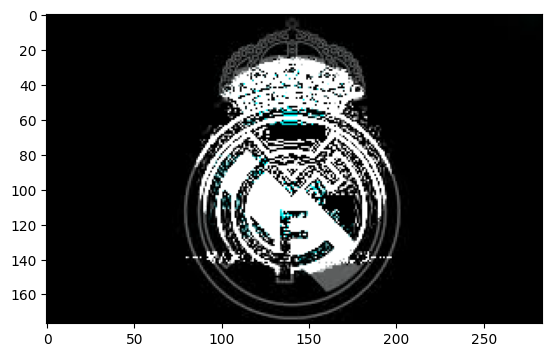

Resolusi gambar 1: 177x284x3 piksel


In [ ]:
# hasil gambar Multiply
result_multiply = cv2.multiply(image_1, image_2)
plt.imshow(result_multiply)
plt.show()

# Dapatkan resolusi gambar dalam piksel
width, height,channel = result_multiply.shape
print(f"Resolusi gambar 1: {width}x{height}x{channel} piksel")

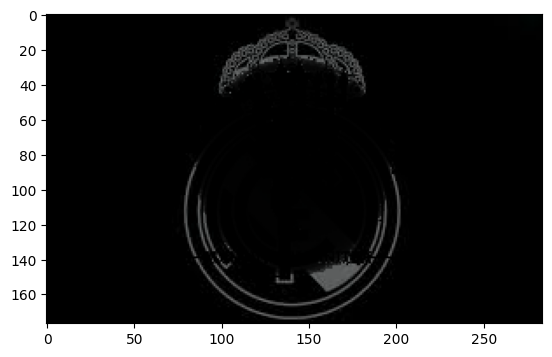

Resolusi gambar 1: 177x284x3 piksel


In [ ]:
# hasil gambar Divaninde
result_divide = cv2.divide(image_1, image_2)
plt.imshow(result_divide)
plt.show()

# Dapatkan resolusi gambar dalam piksel
width, height,channel = result_divide.shape
print(f"Resolusi gambar 1: {width}x{height}x{channel} piksel")

In [ ]:
# Membandingkan data piksel
print("Image 1 Shape: ", image_1.shape)
print("Image 2 Shape: ", image_2.shape)
print("Result Image Shape: ", result_add.shape)

# Jika ingin melihat beberapa piksel untuk perbandingan, ambil subset data
image1_pixels = image_1[:5,:5,0]  # Ambil 5x5 bagian atas dari gambar 1 #channel blue
image2_pixels = image_2[:5,:5,0]  # Ambil 5x5 bagian atas dari gambar 2 #channel blue
image3_pixels = result_add[:5, :5, 0]  # Ambil 5x5 bagian atas dari gambar 2 #channel blue

print("\nData Piksel Gambar satu \n", image1_pixels)
print("\nData Piksel Gambar dua \n", image2_pixels)
print("\nData Piksel Gambar tiga \n", image3_pixels)

Image 1 Shape:  (177, 284, 3)
Image 2 Shape:  (177, 284, 3)
Result Image Shape:  (177, 284, 3)

Data Piksel Gambar satu 
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

Data Piksel Gambar dua 
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]

Data Piksel Gambar tiga 
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [ ]:
# get image from link google image

# first Image
urllib.request.urlretrieve(
'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMREBITEhEVFhUVFhoSFxUVFxgVGBoaFhYXGxgVGBYYHSggGBolHRcWIjEhJSkrLjAvFyAzODMtNygtLisBCgoKDQ0ODw8NFS0dFRkrLSsrKys3KzctKzcrNysrLS03KysrKystNzctKysrKy03LS03LSstNysrLTcrNy03K//AABEIALEBHAMBIgACEQEDEQH/xAAbAAEAAgMBAQAAAAAAAAAAAAAABAUCAwYBB//EAEMQAAIBAgMEBwUFBgQGAwAAAAECAAMRBBIhBTFBURMiMmFxgZFCUqGxwQYjYnKCFTNTkqLRFCRz8DRDY8LS4XSTsv/EABUBAQEAAAAAAAAAAAAAAAAAAAAB/8QAFhEBAQEAAAAAAAAAAAAAAAAAABEB/9oADAMBAAIRAxEAPwD4bERAREQEREBERAREQEREBERAREm4DZj1bGxC+9bTlpzN9IEKT6WCBUb7sLgjcNOMsKeyqSqCxLDfnOi8LXyk2GvPWx3TTiAQ6hLCnpmsFZVzGxLkEg3AB1O4wKh1sSORtMZ0Q2dSf2bHjkN8uhOtiQN2mutwLDUyBitjOoul3GoNgLi3gTfcfSBWREQEREBERAREQEREBERA9nsxnsDIGeEzy8SQeREShERAREQEREBERAREQEm7P2c1Ug7k1u2nAXIAJGY7vUTVgMMatRU1sSLkcFvqdeQnTFhTXKoChd4DFjqCdVBuSWcjK2/foAYEYbNoIp0zdq5ZrHq3FhqLara+U6nlv34l1RbdlVUi4I0AsEIFyWJIJU3HtEz3ChrXenUF9EvdqtgLEljqSQ5sBYDKTw1sdn4Cm6ZqiqxLMd5ZdOoDr2jZRqeZ5yDkcRtZy11svC+hfzci/kLDul3s2qzLRLVQSbXuASfvGG8kHcANx3cN86ZKajQKB4ACVONrJ0y9W+4Zhk9k3OUE5mtvOXdrv3QORG06l+swcX3OM3oTqPK0usDjRU1F73swYjq3By7xdlvqNQQ1rnUGdWApAtYg+BEiV9l0mzdRQSpUleroRbW2/wA+UChOApOzAoAWOutmBYAgWL2U3Yi3WF1OvKqxuybAPSOdSM3C9gL3A0JFu7gZdqGemCEu9sw0LLuuVQ30HUA0IykjnMMPiSBdgwtcstViCCbFQS2hBK2Dndu5XDk4lnt3ACkwKCyMOdwCCdNdd1jrzlZKEREBERAREQEREBERAREQEREBERAREQEREBERAREQLr7NrYu+ulkA01JuwtfeboNO8TqNjUgEZjl35QRuCoLAXJJ063E7zOY2N1qTKti4Ystxmy3AAbLY3GhF7GxsZZu+ShVSo4zMgWwBXrlm6xuAFXVLncbHnrBY7bclUCqGRicxsXAIBKEgXuua1/CQ9iJVzp11NgxqZdAQwHR9UWDNcHrW3aX0tIqYhqadFg3arvuSmi33kPoB538Z5iA1RFW9OmqAIOiD1nFvZLJp5XgWOG2jV6dzUIFDMyK2gF1OnW79Rc6X3SANnqpDKc4okWqDcMzk6gX6TISWNiN81hgaJBrViigrlASndUsGsNdBcXvNuC2eTSzU+mC7wP8AEKL+AC2HmRAkVaj0qFOlhXFRl6zEWbq6m/IXJ0G+b9ou706LhlyFbvYmxZ0smntrmOq8eRlVs8Kqt0dStTsTpmptdgtzYCwJsIwQZWNRKge5z/fU3RRfUsCLqp13wJ2wukWoAQDmDdI6rYWW2QZgAC183ke6W+NQVKTgWOhsdDYjUehA9JQU8bVTMHGSgxJz0x0uXNvswNgCSTqDa8YHoqdOtTp1bhmRg2uqG11uo6r6OLaHd5Bp2sufDHmpFTTc1yLkXYm16h103HSc1Omr0TTp1mqBBcFaZVchswPVtYXv1dDqNTOZlCIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiIHoNt0m7Px5QhX61MkBka5W1wbgcDpIMsaezggD4higOoQa1G77HsjvMC6x1LMj0ydL9QkZFN8pXIAbGwuCApJ+WxXqJSyPUCLbTRaHiATd/6AZR1Nrt2aK9GOyLXLkcAXOvkLTEbKqnrVCKYPtVWyk+R6x9JBP6bDopUVBYm7KBVcE/zoD6cJiMfhgCMhsd9qa2PrUkL/DYde1XZu6nT+rkR/lf+v8A0QJ9PFYfrAPkDaMMlRb+OSqR8JNwFXKpWhVBB3KGWpbwSoEYeAJlH0OGbdVqJ+dAw/paP2SW/dVKdTuVrN/I1jAtsNRakaje2bmyAo1rHQU9LdaxvYi3xh7axhpt0dNgDYdI6DIWbXeF0A14SKm0K1LqOCQPYqgkDwvqvlaZnD06+tIlKh16NzcMfwOePc3rKKwsTxnkzq0yrFWBBGhB0MwgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAnqi5sN5nktMP/l6Yqn964+7B9leNQjmeHrAyKrhRqA1ffY6rS8eb/KaMPg3rE1Kj5Vv1qjXNzyUb2buEz2bgek+8qXK5rADtVHPsL9TwkzaO0ejIC5TUUZbjsUh7lMe9zaBvOHampFBVRwM1mIauV4m25PyjWc5UqFjdiSTvJNz6mZq7qRUuwJOYNrqQdSDx1lhXpjEKalMAVQL1KY9rnUQfMQKqJuoYZ37CM35VJ+UlDYmI/gt8IFfEkV8DVTt03XvKkD1kjBYVQvTVuwDZV3Gow4DkvM+W+BPwBqPTHTMjIxtTWsbFueR96+O7hIuO2TbMaebq6tTYWqIOf41/EJCxNd6z3IubaKo0CjgoG4ASZs/adsq1CbL2Kg7dPw95eamB5Qxa1gKdc67krcV5K/vL8RIWLwzUnKOLEehHAg8QZb7U2fnu6gBwM7KvZdf4tPu5jhI2DcV0FBz1h+5Y8/4ZPI8ORgVcT1lIJBFiNCDPICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiBM2XhhUfr9hAXc/hHDxJsPObBmxVe5NgdSeCIo+QAmT/d4VR7VZsx/Ihso82ufKTNkYcLSu26pd3PKjS1I/U1h5QMtoYsUkXIMrMuWkP4dI+3/qPvvymn7O7F6ds76Uwf5jyHdzP+xEpq2KxHe7a/hH9gB8J9Bw9BaaKiiwUWAkEbH7Np1aXRkAADqkC2W3Lu7p8/JNKp1HF0OjqdNOIPKX32o20WJo0z1Ro5HE8V8Pn84+xvs61Zc7kopHV01Pfbl84ECrtGvVNs7n8KaD+VZidm1zr0NXxyN/ae16VXC1rXKuuoI4jmOYMsOlSqemNVkA1qUwxzE8Oj7m/plFcmLr0jo9Re4kgeanQzVjMW9Vszm5tYcAAOAA0E34zF1MTUGhPsogubDgBfeeZm+rskWK06geqgu6D45D7RHEQNtcnConRdpwGNYag/gQ8AOPE+E016a10aogC1FF6iDQEfxFHDvHnNOzsWFvTqXNJ+0OKng68mHxior4Wvv6yHfwII5ciDu74EnYuLJK0ibEHNSc+y/un8DbiO+atrYYKRUQZQxIKj2Ki9pO6x1HdNe1KAVg6dioM6d3NfFTcektkP+Ip676oynur0hdW7s66GBXbS+9prXG8nJU/OBo36h8QZWSy2L1meid1Vco7nXVD6i3nK4iB5ERAREQEREBERAREQEREBERAREQEREBETfgFvVpjm6j1YQJe3dKwpj/lqtIeSi/xJlhtc9HSqKOaYYeFNcz+rGQe3jvGv8M/9ps2490pfies/rUI/7YGewcQuHRq7LmuwogDfa2Zz6BZ0e19qquGNWmwOfqoRzP1Av6TksbphsOOfSOf5goPosYrTC0B7zVHPiCqj5GQZfZ/Z3T1gD2V6zeHAeZ+s+gAW3TnfsVRtSqNxZ7eSj/2Z0caIO1tmLiEytoRqrcQfqO6cFisC9Op0bKc17ADW99xXnefS5g1BSysVBZb2JGovvsYHG4rBPg6IIXr1NGqD2AfYXkTxbyEo6VQqwZTYg3BHAifTq1IMpVhcEWIM4Tb2xjh2uLmmToeX4T3wM6u0aQ+9pp98w1uOqjcWUcSd/deVDuSSSSSdSTqTMYlFjR+8wrrxpMKi/lfqsPC+UzZsaqctVRvUCuv5qRB+RM17E1eovvUai/05h8VEfZ//AIhBwYMp80YQG1PusUzLuzCqv6rOPnMNt0wuIqAbicw8HAYfOZ7Y1FA86K/AsPoI21qaJ50aZPkLfSBXREQEREBERAREQEREBERAREQEREBERASTs02rUv8AUX/9CRpkjWII3g39IFlQOXHDur2/rtMtsranR7ulX0qt/ea9sHJimZeLCqP1AN9ZO27Tuj29itnH5K6hgfUWkEDaGtDDH8Lr6Of7xi9cLhyPZaoh8bqw+BntPr4RhxpPn/S4sf6gPWMAOko1aXtC1ZB3qLMPHKb/AKZRZbE2p0GHVrXUVSrgb7MoIYehnW0aquoZTdSLgifPtk1FOek5stUBbngwN0J7r6eclbH2o+EqGnUBy3sy8VPMf71kF/8AbA/5b9a/Izldm7Pq4jN0Z7Nr3a2+9vlOm+1lUNhQykEFlII8DOe2Jtj/AA2fqZs1uNrWv3d8C02VsGvTrU3a2VTc9a/wnUV6KupVhdSLEGUOzftMa1VKfRAZja+a/AndadEIHz/bmyGw780bst/2nv8AnKufUMTQWopRxdToR/vjOB23shsO/ND2W+h74Hmw9KjN7tKo39B/vH2f/wCJp91z6KTGC6lCtU4tagv6jmb4D4z3Ywt0z+5SYD8z9RfPU+ko82t2cOP+iD6sxjbP/I/0E+Nz9Y25++yDXo1SkP0qL/G8beP37LwQLTH6VAPxvAroiICIiAiIgIiICIiAiIgIiICIiAiIgIiIFlj+vQoVPdBot4rqvqp+EsMG4q0kudGX/Cv3MOtRb6eUrtkMGz0GNhVHVJ4OuqHz1HnPNmVQjvSqaI/Ub8JB6reKn6wMMBW6GqQ401p1F7jow8Rv8orI2GrAqeyQ6NwZTuPeCPrJm1cMzhnI+9p2SsBx92qOYItf/wBzDG9TDrSq61L5lHGmp4MeN/d4fCBq2jhgQK1IfdsdQPYbih7uR5T1MUlZQtYkMBZaoF9OCuOI798jYHGtSYkWKkWZDqrDkR9ZLOAStrh2140XNmH5WOjj4wN9bDvTwbhmDL0ilSrZlOjXtym37J4CnW6XpEzZcttSN+a+7wEpK1N0JVgyniDcfCbcFtCpRv0b5c1r6A7r23jvMDuqWycPSIqBApXXMSdPU2lRtr7TAApQNzuL8B+Xme+c3WxNWsQGZ3PAan0EtNm/ZmrUINT7te/tHwHDzkFn9k9qPUvScFgouH5Dkx+Uv8Vh1qIUcXU7/wC45GY4LBpSQIi2HxJ5k8TMNp0HqUnWm2ViLA/TuvuvA4Xa9ZbrSpm9OncA+8xPWb6eAljsykKdNM3/AMqp+RNKa/qbXzldg9nnO3TAqlLWpwPco723D1krbOJIUodHqEVKgHsgfu6XkNfSURtlfeYjO+5Sazn8vW+JsPOQa1QszMd7EsfEm8sG+5w1vbr2Y91NTp/MdfBZWQEREBERAREQEREBERAREQEREBERAREQERED0GWeNXp06de2thWHwFQDkePf4yrm/B4pqThl8CDqCDvUjiDAtNnYtqgUK2Wugy020s6/wmvpflfwlPWLZjmvmub33343vxk7F4QMprUb5PaX2qZ5HmvJpmuJSuAtY5ag0Fa2h5CoOP5vWBVxJGMwT0j110O5hqrDmGGhkeBbDEM+DqZ2LZaiAXN7XDbrzHZbBaNd8iMVNMDOoYDMWvoZGwe0HpAquWzEEhlVtRu3jvmeI2pUdChyAG18qKt7btQIFlsj7RlHtUC5Dp1FC5e8WGo7p2SOGAIIIIuCNQQeM+Wy7+z22zRORzemT/KTxHdzH+zB3MwrVVRSzEADUkyuxW3KanLTvVc7lp6+rbhKLaW0LG9Yq9QarRXWmh5ufabugb9qbTvaqy6DWjTO9j/Gce6OA4ylwNDpGerVJyL1nPFidyD8RM8o0XxDNUqPZRq9Rtw7hzPJRMMfjA1kQFaSdkcSeLtzY/DdKNWNxRquztx3DgANyjuAmiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiBuwmKakwZDY7u4jiCOI7pONKlX1QilU40ybIx/Ax7P5TKuIFgmIrYcmmw0406gzKe+x+YmWfDVN6vSPNeunjlNiPIma8PtR1XIbOnuVBmA8OK+RmebDPvWpSP4SKi+NjZviYD9mKexiKRH4iaZ9GEfsepzpnv6Wn/wCUfs5D2MTSP58yH4j6x+yT/Gof/asB+yrdqvRX9eY+igx0eGTe71TyUdGvmza/CP2YB2sRRA7mLH0UR0eGTe9SoeSqKa+BLXPwgeVNpORkpKKanTLTvmbxbtNM12etOzYhsvEUl1qHx9wd59Ji21SoIootIbrrq58XOvpaV7G5ud51gSsbjjUAUAJTXsou4d595u8yJEQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQP/9k=', # link from google image
"gambar_1_logical.png")

# Second Image
urllib.request.urlretrieve(
'https://wallpapers.com/images/hd/manchester-united-logo-with-lion-odjbuo2ld2fsre11.jpg', # link from google image
"gambar_2_logical.png")

('gambar_2_logical.png', <http.client.HTTPMessage at 0x79be1ac7bac0>)

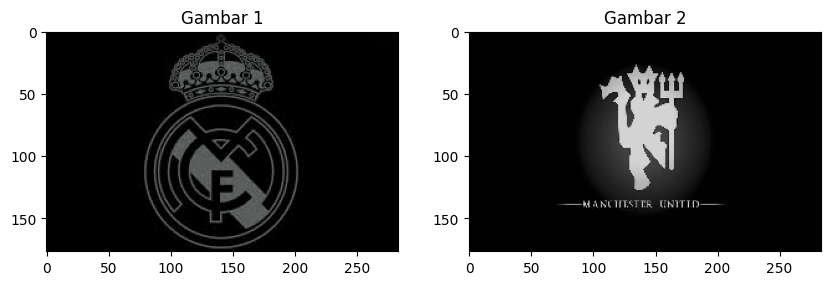

In [ ]:
image_1 = cv2.imread('gambar_1.png')
image_2 = cv2.imread('gambar_2.png')

# Dapatkan dimensi gambar yang lebih kecil
min_height = min(image_1.shape[0], image_2.shape[0])
min_width = min(image_1.shape[1], image_2.shape[1])

# Ubah ukuran kedua gambar
image_1 = cv2.resize(image_1, (min_width, min_height))
image_2 = cv2.resize(image_2, (min_width, min_height))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1) # Changed the subplot index to 1
plt.imshow(image_1, cmap='gray')
plt.title('Gambar 1')

plt.subplot(1, 2, 2) # Changed the subplot index to 2
plt.imshow(image_2, cmap='gray')
plt.title('Gambar 2')

plt.show()

In [ ]:
# load image
image1_logical = cv2.imread('gambar_1_logical.png')
image2_logical = cv2.imread('gambar_2_logical.png')

image1_logical_not = cv2.imread('gambar_1_logical.png')
image2_logical_not = cv2.imread('gambar_2_logical.png')

image1_logical_xor = cv2.imread('gambar_1_logical.png')
image2_logical_xor = cv2.imread('gambar_2_logical.png')
# Dapatkan resolusi gambar dalam piksel
width, height,channel = image1_logical.shape
print(f"Resolusi gambar 1: {width}x{height}x{channel} piksel")

width, height,channel = image1_logical_not.shape
print(f"Resolusi gambar 1 not: {width}x{height}x{channel} piksel")

width, height,channel = image1_logical_xor.shape
print(f"Resolusi gambar 1 xor: {width}x{height}x{channel} piksel")

# Dapatkan resolusi gambar dalam piksel
width_2, height_2,channel_2 = image1_logical.shape
print(f"Resolusi gambar 2: {width_2}x{height_2}x{channel_2} piksel")

width_2, height_2,channel_2 = image1_logical_not.shape
print(f"Resolusi gambar 2 not: {width_2}x{height_2}x{channel_2} piksel")

width_2, height_2,channel_2 = image1_logical_xor.shape
print(f"Resolusi gambar 2 xor: {width_2}x{height_2}x{channel_2} piksel")



Resolusi gambar 1: 177x284x3 piksel
Resolusi gambar 1 not: 177x284x3 piksel
Resolusi gambar 1 xor: 177x284x3 piksel
Resolusi gambar 2: 177x284x3 piksel
Resolusi gambar 2 not: 177x284x3 piksel
Resolusi gambar 2 xor: 177x284x3 piksel


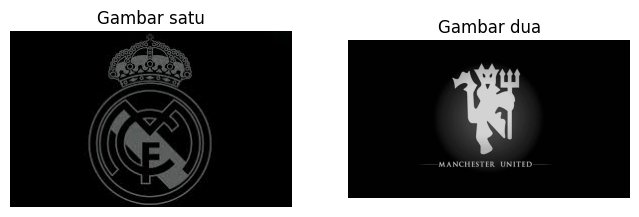

In [ ]:
# plot figure
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
plt.imshow(image1_logical, cmap='gray')
plt.title("Gambar satu")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image2_logical, cmap='gray')
plt.title("Gambar dua")
plt.axis('off')

plt.show()

#logical operations
1. result_and = cv2.bitwise_and(img1_gray, img2_gray)
2. result_or = cv2.bitwise_or(img1_gray, img2_gray)
3. result_not = cv2.bitwise_not(img1_gray, img2_gray)
4. result_xor = cv2.bitwise_xor(img1_gray, img2_gray)


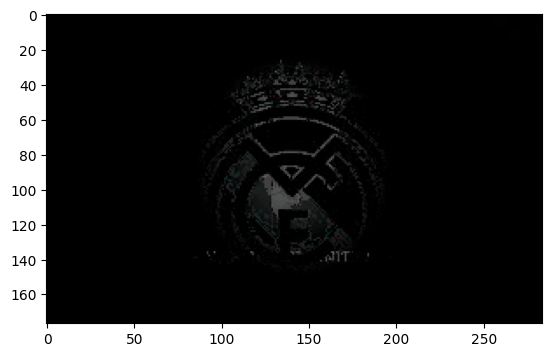

Resolusi gambar 1: 177x284x3 piksel


In [ ]:
# hasil gambar gerbang AND
result_logical = cv2.bitwise_and(image_1, image_2,mask = None)
plt.imshow(result_logical)
plt.show()


# Dapatkan resolusi gambar dalam piksel
width, height,channel = result_logical.shape
print(f"Resolusi gambar 1: {width}x{height}x{channel} piksel")

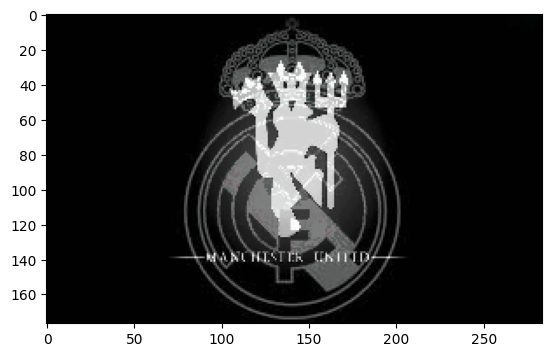

Resolusi gambar 1: 177x284x3 piksel


In [ ]:
# hasil gambar gerbang OR
result_logical = cv2.bitwise_or(image_1, image_2,mask = None)
plt.imshow(result_logical)
plt.show()


# Dapatkan resolusi gambar dalam piksel
width, height,channel = result_logical.shape
print(f"Resolusi gambar 1: {width}x{height}x{channel} piksel")

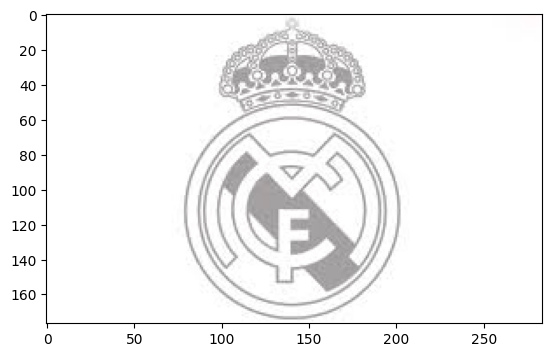

Resolusi gambar 1: 177x284x3 piksel


In [ ]:
# hasil gambar gerbang NOT
result_logical = cv2.bitwise_not(image_1) #image1_logical_not
plt.imshow(result_logical)
plt.show()

# Dapatkan resolusi gambar dalam piksel
width, height,channel = result_logical.shape
print(f"Resolusi gambar 1: {width}x{height}x{channel} piksel")

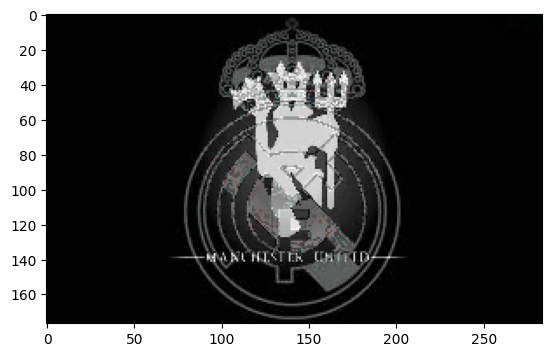

Resolusi gambar 1: 177x284x3 piksel


In [ ]:
# hasil gambar XOR
result_logical = cv2.bitwise_xor(image_1, image_2,mask = None)
plt.imshow(result_logical)
plt.show()


# Dapatkan resolusi gambar dalam piksel
width, height,channel = result_logical.shape
print(f"Resolusi gambar 1: {width}x{height}x{channel} piksel")

In [ ]:
# Membandingkan data piksel
print("Image 1 Shape: ", image1_logical.shape)
print("Image 2 Shape: ", image2_logical.shape)
print("Result Image Shape: ", result_logical.shape)

# Jika ingin melihat beberapa piksel untuk perbandingan, ambil subset data
image1_pixels_logical = image1_logical[:5,:5,0]  # Ambil 5x5 bagian atas dari gambar 1 #channel blue
image2_pixels_logical = image2_logical[:5,:5,0]  # Ambil 5x5 bagian atas dari gambar 2 #channel blue
image3_pixels_logical = result_logical[:5, :5, 0]  # Ambil 5x5 bagian atas dari gambar 2 #channel blue

print("\nData Piksel Gambar satu \n", image1_pixels_logical)
print("\nData Piksel Gambar dua \n", image2_pixels_logical)
print("\nData Piksel Gambar tiga \n", image3_pixels_logical)

Image 1 Shape:  (177, 284, 3)
Image 2 Shape:  (1080, 1920, 3)
Result Image Shape:  (177, 284, 3)

Data Piksel Gambar satu 
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

Data Piksel Gambar dua 
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]

Data Piksel Gambar tiga 
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


Geometrik Operation

In [ ]:
# first Image
urllib.request.urlretrieve(
'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTExMWFhUXFxcXFxgXFxUVFxgXFRUWFxUVFRcYHSggGBolHRUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGhAQGy0lHyUtLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIALEBHAMBEQACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAACAQMEBQYABwj/xABEEAABAwIEAgcEBwUHBAMAAAABAAIRAwQFEiExQVEGE2FxgZGhIjJSsRQjQsHR4fAVYoKSogczQ1Ny4vEWJLKzc4OT/8QAGwEAAwEBAQEBAAAAAAAAAAAAAQIDAAQFBgf/xAA9EQACAgECBAIJAgQFAgcAAAAAAQIRAyExBBJBURNhBSIycYGRobHwFMEjUtHhBhVCYtIzkiRTcrLC4vH/2gAMAwEAAhEDEQA/AMIAvZRx2OtamsNjjQjYyZIqahTWjHTINW2VOcoiI+mjzDoHPwWsdMVpU2ysWc5yyHTGy5MlYeYEsndOtANi5FrMgSERgCsE5YZBBAc5A1nJQpipRkxQgOmEgMmKlHTFCVjpipWMhC0JGOmdtuptdh0wlJj2cEoyZ0I2MLC1BTEIQodChK0PFhBIWTCWGOWMKjygsdhe2fmSY5TKwbH2hLYyQ41BlEE4SEo6Kq5bqn5h0RSFrHQoQsdMFxJTJBvsBMbbp7CmE1vNK5jo4GEbsIrkUxkxolGxhQEQ2dCwbCawrBDFApWhhDTIStBQgCA6FSjJigIUMgglHQD3Rogx0zmtUmx0HqENxkLl5JGrHQrVJqh0KAlGQuVGxjssrBTELUCiYqDRVM5JQ4oRSMGEwCRlXrWfmRwatYbHmOQHTHwEpRHH/lbYdEW4pgpLHRBc1MMhvLPcnSoNnHXQbI3QyYgYlbHQWVYZMQtRQRt2ghOnYQOrPJNY9khlHRCw2OstpWsNkxlpC1jJhm1Q5rDYLrdGxkyHUt49UBkxrIlYyYQagMmc4cAlY6YL6XLdSbsdDYYUo6ZIaAkY6YvV8kL7jI7ICs0MmE1qm40OmFkStDJnFnFZDCOasNFjLgsyyYiUYVYISxiYQvTPzA5ax0KEbKJDh70CgrYHFI2OiNcVUBiI4z3J46BsadUB4p7oKEzhKPYoqDmsNYhqhMosPMd1oWGTBJWGHKXomsOxYUaYQbDZPtbfXQJHNI1lgyzPJI8gbC+hFJHLaGsjV7IqiyoNkG7oEDZU50OmVtQxwKNjJjLqnJbYomcHhTeo6FzpKHTALwtysZSHGOSNDphioFNodM7PyWTGsIOnbdNVhTFFRRkqKJitelGTEeYWWoyGXrFUwUCgoQCOBqDH5WSyF6Z+XI4LDoVFD2IChJjI4mFOyiINy8lNHUYYe7gE+2oRAhuMhxrJTBQLmp4x6hbGnfrZMFCsB/UIOh0O02H9QkHTLG0odnySSlQS8srDjHyUJ5GzF3a2McFCWSgliLDSTG3GB81PnbVsOiEo2RPKezThO24/JQ4bN4mPmj97+q0C9HTGK9jzC6VkCVGIWSqpjKRn7u17PkrqRSLKupThWTsdDPh8kCiO12/NMlYdgmt7v6UGMDEd3cFNqyiY8xv60Umh7HQP1AQaCmdtr+CyfQYJw4rSVhTAczl9yi0VTBOuiTYohW0ydETox45MtLLo1XqbMIHN3sj11K1FqhH2mXtp0LA1qP8ABunqfwTLHJg/UQXsos6eAWwEQD3klHwWDx8nRGIIXYfmCBhEYVzeC10MtRC1SbKoj16sILUe6IL3+aukCwGt/X6KDbY6CIWCEHKkUGx1pBVLChutRPKURgGsPJI9B0Tbaj2KbdjI0NhabaLnyMZM0dlaACTsuOchrLQOgaNjTcnUbiSADGsCDxcOErz58Xj1p7Xe+m++jrbZ66rQ3LIkdVRbrVrU2OOsOczPxiZIjfYQNtBCRYcuT1pyrskk2lru3aunrSS0KRxzkrhBvz1r6CU+pc2X1qTX/C9zR8J5gjYa/iZTFwaxxXhuq2W6371GWta690gqGXJ6yg2u6T/ugHBw00cNgS6e6HAQZEka/ZPZNYcUor+Lo1o+3TrVJPdW9k7diNNPQhXNoH7Ag8R5+Y0K7sc4tKUXp+beXns+gUzPYlYEcF2wY8WZe8pawumJUi5OxM0PEUMK0XW4zAPd+vJFoKYrR2KXUpegQ05x4fgg1asyY4FIezkGh0wqbTMcEy1GUWyzscDq1NmGOZ0Hmd/BJKJaMUt2X1n0OaDNRxPY0QP5iNfJZYZMqs0VsvmaCywynS/u6bWnnuf5jqrQwRXtMEsrluyTVMbvA7lT+HHYMVeyIdWvTHElSllR0xxzZGdeN5KDylfBkYSF0I/LEE0IjWNFyEmPEbe5IVTIlSSVSKSNYyWyfzP4pnQUEKaAwJplMlY1gsHNVWgDnO14I6Dodtqxngg2kMizplh71NsoibRsjoQlbCaPDKG0hQkg2XF1DGZokNY5/CJggb77O7jB4LxuNlSUL1lp071s96u9PItgxvJNRXVkLDr11fO2q5tIZDkAaQ722u1bO8wPa2EDguWfhpKG0d71esWnTp7t73vr1Z6PF8PjwOMsXrd9q939imZhgmc2YdYQWtB6xzQSOsDTrlnQnhrqm/VtqmqdJ23on/Lfft3PSyce3BqKSdd9Pd8tvPSididrSrVM1FxDS33nmQ5zQA1jCPecYdoOQTT4jkb0b1Wj9pLq5dku5y8DxMuHxcsl122rv+w7anqbXPTqDOXBwa5u2YNDg0H3ju2OOp4rLIllvr7NV0VtSvan9nW5LM1xXF1NequqfTu3+aEzCLt1QS5oa5r8pAEaOA3B1mY0nSCeaOBwhl5U1UlaWnxrq1s0lotfIhx3DxwzXhu01d/mnTcfvgNiF7mI5IlBc4dTqGBuu2EdNS0WyJV6MviWzHmqcpZalNe2jqZgg+ISOI1EQ2/HySAFZRMdv61WaGQZtCe3thKkPyjtrhNR5hrST2D58ksoJalFHuX9j0Pe73yB2DU+ew9UjoonFF7QwK3oCXZAeby2fCfuC0UhlKUtIqyWcXoNGjpI5A/OFW0tDeBke+hDuukQ4DxiT6qUshWGCK3ZXVccJ+0fkovIzrgoR2RGOIzxSuTZZZKGn3XakbG8VjRrdqUPOO3GCuBXoUfkykR3Yc7kih0wThTjwSUUTG3YM/kB4opDWJ+yDCqkjWOU8IjeErHTHmYWOQ80UhrD/Y7TvHmVWKDYY6PtOxHmmChT0QzbEecfJG0Md/0TUBEiRz7OxRk0ysQLroxUa+GNOXhMTEcVlHQYdq4RXoFudhbOomfvU9JbBs02CUzAkKcwGhfhIqtcM2XM3KfZa7QEkFs7HU9+i4M8FNV+aOxoScZJoz1xYQKgDWvLBkiocwAZDcswMjTAMmZ4jgvAjwuVZUra9bXk03V8zT37L2aeifU7XxLStadfj8Pyhy2o1CwFxh5GzRnYOQzMYJG3Ecd91PNw/DQco80d+sta62rnre31QsJzdNp/D+tISjaVAIqPcT+6x8eIe0g8eXDxDjwz5uSUNtPWrXz0XTzHyS19WMkvPX8+Qxb2z3Zy9lMHMDma4EyNA8vDQGO3+ySrZuG5IxeOTcVF7+z/AOnd819FzIXHnls/l+VXyNDheB/V585IqFtQgtaXfZIh3CYExzjaF6XB4HiilKr0VJbU21v2v8epLLk52vIj4nhZdoF7GKtzKyiq4A4bSu+E0dEC1wVz6YioMw57p8ijNaPUvyp7MsbzBLe6EAQ6J1ELilmyYn62qJvLLH7Ssy970JqUyYbLddhJ37N1bHlxZNnRfHkxZNpV7x2x6GuO7MvgSfIffCeUscdLsMp4o9bJrcDp0vegkcDr5NZMeJSp82358x4z5vZ/Pi/2REu8RyaMYdOYgfyt/FHkXUpHGt2/z3v+hVXWI1Xbl8ch7I9N1J0tkWSS2SKypVdyhI02P/EZHNR87FCtAeHIbqMq7ZXeRUpIaONjJt6vwu8lJotGI2berPun0WS0HoF1OoOHqEB1QJ6zl8kKQx7hfYEDwXTHIflTj3KS4wUA7KnNoZJojuso4eiykMpHCyB0jfmmi1Y1jN1hwnQbKnMqGQ0bGN/vSqiiZGuKIAkaeCZUx0yrq147PBOnQQPpbhxPomUhiTaYi8H3itKSGiXNHpE9sag94Ck4QluiiZe4d0ipuEPaJ5wpPBL/AEsey4uqNK6DfaBjZSjzYbtGGn4K1gGQKDzqW5kR7y7NP2GCXj3ifdb2Hm7s8yNJ8vjuPx8MtdZPZfu+y+5XHic3psVtox1V5ghzgA4ueRIDtA5rRrBjcANMbrhXAcbxq5uIlyQey/t/yd+RbxcWLSCt9/z9i4p4R8VV38IY0eTg4+q6cfoThIbpv3t/tQr4nI+o4cIHCrUH/wCZH/gnl6G4OS9ivc5fu2BcRkXX7EDELJ1MZnljmgxmnq3AuMACTxmNHSeAXG/QuXC+fg5u+z6/FaP4qvMp+ojJVkQ/Z4s4aPOZmxfHtMjg8cQNtpEazqQ/CekHz+FxK5Z/JP39vs/IGTDpzQ1RZ1G8hM7Hv7V7sZa6iRQ2LaeHzXQpxoe0hz9nCJJAQ8fsDxew8LemPaGpSOUpaC80noE27AMFunePkh4OmgHgvWxm/tTVE03ntHDyT48nJpJFMWVY9Joz9TDTmIcXDwDfxXT4lq0dfitq4o44PT/ed/EfuhTeaROWfJ+IKnhdPbIPET81GeSXcRcRPuPiyY3YAeACRTZnll3Gq1EchoqQnqFZGV9ywEzAV9KOvHNrqRalu0/ZCXlizsx5JdyDc2beSHhqzrjlZXXNmFJxo6YyTK99nrwU2imh7vklCz805ExipaAk6LPI0DwH0IVfCgUyzAeCXYjNweDz70/jqgLh5Cfs3WdAJ71nm0CsMrEr4WHA7HwKVZxvCaKa+wR2wLd11Ys0WZxaM/iWEODj7g8/wV4yTMVNWxeOLfNMqGTCFs9o0ykpHuOgjQPw69/5oMdD1ux06NMop0gtmkw15EEzp4KOSfQKLirijmtAB9t8wd8oEZna8pAHaRwleLx/EwwY3krXZLu/zVlscHOXKV/XB/sN0A3J13J1M+8SZgGZ1cZGXN4MF+kguKzetlnrFPp/uf7fTrXQ14j8OGkVv/QhWOLWz6xp0X5arCS1+4eT74kmamwmd9wdJF3i9J8HFcbl1UvaT6Lpa6eVezs96EU8OR+FHStvz8s0Qxsgf3BzcZeGsn91wDnEd7Qu+fprhFFNNtvolqvfdL5Nirh8li08cI96iI/cqZneAexo9Qow9O8NJ0+Ze9Kvo2/oO+GyLaiuu7vrXglhc6HFlJuU5GDRziSQC6CAT2ho3JPPlnxHpObx4NMcer0t9L/ZfF+TJRwq56t9Pz86EWncsYA5p9jbXTLGmV07NG2vuRwaCBKLlxb/AEnF6ZFpGT3vs+99H183Vs14f8TH7PVFth2KtZ7GpY6cumrXaksg7DQ6HYgjiAOv0bnySb4fNpOH1S/p9V7hMsEvXjsx256Qho0YZHb+S+hw4092Iooz+KdKanBpA73R9y74YcaOiCiuhV0OkVQuOgjsmfmVbw8Z0LU0Vl1j6YqCYJjhPDh4qE5Y4ug82NOmWlpLT/egEDgZ8wueUlL/AEkZtS2hoWlO9pvEOInnsCoSxTjrHY5J4Zw1jsU+L0spzAkA8tu6VbDLmVdTr4WalGnuUFzigaYl08eCq46bHUsfkR34uODj5pEl2H8NPoMPxg85WuK6FY4IEV2KSN1TmQ6xRO/aPapOZeONAVL9LzlVjRHfdghCTHjGiM6qEhVM93hc58DSQDeKEhkA9KYjO3KdbAAZshLcwrm+iAHGyHUtC46O4cV0Y8iitUQlil0ZSXuA1nEnrGn9dy648Tj7E/DmtymuejFxwe39eCquIxDcsiDW6PXQmA0x28kFlxvqPTIFTD7lv+H6hNcXswqx60bWG7ChKhkaKyqO0Baea4MstCiBu7rV7jMatEbhtOc8doiqR4L5viI/quPhgl7MdX8rfz0R1QfJic1u/wA/qZ7pbifUW4pjSpVkOLdIEDPl5CIaOTR2Lp9D4f8AMuPnxOT2YbL/ANq+G78/eT4qfgYVjju/xkTo7bUrW3+mVhLiJpjiAfdyj4nbzwHiun0txWf0jxf+X8O6ivafet78o9ur+AnD44YcXjT36fndltgfSFt4DTfDKoOZoklrgDI00zCNC3jvpw4OO9FZPROSPEY1zw2dpaPz7X0fTb33w8QuJThLR/n4y5baEv8AYYwVHiG02aMAG7nGNtiXEcgBJ1jknL0rlUMceWEd3Sv87JPzfk6/gRt6t9Pz6sdu8NrU3NEOc/8Awn02wc0atIJIb4nKWzOxXV/l2bhc8Z8I/VejUn08+69ytPboJ40Zwayb9KJmJYSWuY9waOtAFRrdWiqGzIkaggOGvwt4kreneHUsfjw3jv7r0+KdfPyNwuWnyvr9yDbWQGanJke6TzblLXdujqevFweV53FcS2sPHxWu0vev+Sv4UVxr2sXxX55F/wDQWva17WgBzQe6RMH5L6fHkV0QjJGexSlRafbdMcAPvXoRlJrQvG+hV4ljdvRINsBMaktBgnQxmTRhKS9caKb9oz930kc8Q5zneOngFVQS2LxdbIYodIXA6cO1ahm29yzpdLDx079UUqCi9w3pSCMryC06c9ORHEeo9ErwxbtbgeGMtVoxvHLAPGanrxgGdObD9oabbhFbUy0JvaXz/r2+xkLhrmnQ+eqk40XdojG8I3BH5KbQFIFl3oeCIVIcZdKckXjIM3CRlVIZNdFjRkNG4KA/Me5XGJ1W8D5D8FZYcbPyf9ZxD/1fRf0IbMcqfqEJYIXsUWfO/wDX9hTjFT9Qh4EBlmzfzfYAYo7XX5JlgjQ6z5f5jhipA/4SS4dWVjxGStyNcY+8bAIrhodQ+PlfX6EJvSyqCdG+I/NU/TYq6jxzZe6+QP8A1nUnWmw/zD70f0uLux/Gn1SJFLpdJE0fJ/3ZUJcIq0l9Blm7osBj1MnWm8eE/euf9PL+Yp4i7COv7d0gtI7w/wC4FGOPKmqYeaIrbWg4DKf6gPmFRyyLdfQKok0rASInzadyuTLPax0Zp9MllM665HHTi6pSDvMVHea+bxS/j8ZPqozX1r9jrl7GNeaJFxhVOtbXnWNDgGQJB0NOmajXA8CDUK9X/D8ni4ZTju5N/ZfsR4xc02n2Mf8A2h0Y6imIDQHGNtRla3yE+ab/AAklJZsr9ptL7t/N/YX0k65YrbUzGH4fUc8dUHl7faGTUiDvp2kL6niuI4fHj/jtKL09bZ+R5+OM5P1Fr5GktMXvrWv9Ke18GGva9paxzeDOTeJBGxneSD5vCR9HvH+n4aUXu9Gm/f3ZfI8/NzzTPW8DxyjdUhVpO0OjgdHMdxa4cD891HJhljlTKRfMrQWPCaDz8OV/8j2u+5cvEQU8M4vrF/Zjx0kn5oztR0VZ55B5CufuHkvk8Pr+jMifSafzpHe1/HXmi2sXg0Wgn7Tx5VXAei+l4Jvwscv9sfsjnpxk/e/uU2MYIXSWw75r2MeXuVU+5gMZwl7SZaR4FdkHaKx12KGtR12TNFNSHcAygkaxl1VwWCmOU7stggx3FAdSovcN6VvYCHe00xp47jke1NdlFJM1X1N0zOxwzcZ3nk9vPtHqoPR0ysZcuj2/Nv6GcxCxLXEEZTwB2PaDxQceqH5bVoqnUiCUK0FG5IUpLUpFndepspYIrfNFjpgmogPZ9NupNPAKClJHw0sOJ9ERfoY4ZfJF5NdSEuE/laANq7m3yK3iIVcLlWzRFqW7tfd9U6nEL4fL3REfbPj3WH9dyKyQvqK8OVb0QK2GvcY6pp4mC0K6yQ7iVJbogV8I1M0yP9OvyKsmmtxkyP8AQ2tEFr/Fp/BMkxlIfo0G6BvyhaSdBUkWdK3d8K5dCqbOFo/X2PRPFx7jaj1GyqfAmlOHcZWWVKnESAD+C4MzvYrEzd04NbHwOI8KTszR/EabB/EF87ixP9dnw/8AmRlXvkuZfdnXJ/woS7NfQtsJqMc6rScfZqskdumSp6Gn68l0+gcl4HDrF/R/3TE4qPrX3RT3VCnUbkuBLQDTrRuw6fWs4+yWhwPwuJ1mDH0dkfo7jZ4JaKXsvp/t+adPzHzR8bEpdtzP4N0fq2l49roex1ImnUHuvbnZr2HUSO3kQV6n+Js6ycHBr+dWvhIhwMOXK/d/QzGN2FWnTl902sJAyiq9+uusE/qV3+juOw5s3Lj4d43T1cFH4WiGbDOMbc78rsj9Hcbr2j+vpBxZIbUGuR8yQ1x4Hcg7jxIPr5nDI1ik1zPVd9N2l9yEOaPrI9Yd0jpXNqH0XE9Y5rC0+80gh9RrxwOUHsMt5hfP+kpPhsGRz7NL3vRHdhrJJURqV0HVTPCB/E0GfMVh/KV8rKPhejF3nO/hFf1R3e1n9y+5fYc1ppU/3va/ncX/AHr6jhscscYQ7JL5Kjlu22JXomdPnsvTxtNalY11IVwQRlqCR5HzV1C9Yl1j/lKi7wKhUH1bmz8LoafA7FNzTj7SHtr2kZjE8B6s+00jw08DsU8ZJ7BpPYzt5hY4TusCiuq4eeaAQHW0SsEfw+4fScHNcQR5EciOIU7LRn0ZtrHGadwwMqNE8Wn5tO/3j1W80VWjtDV10eOrqRzD4Xb+B4+iek1qVUot1LRlFVs40IIPaozhqPyNEOtbKLRiG6lHmtQyGC0oUOfQ1PE6R4nyRpn5goxJFG6pnZw9QpzjIrDl7/ceLWHi0+X3qdyR0RhCXb6Ef6MCTlc4dzj95hMputV9Ci4dP2W17mwWUKg2efH8UspwvYdYcy2n8w6VSs0EwHeP/CH8IH/iF2f58BRVfPtMHDh+IVoxVaMm8jXtRHWVG/B6D7kJKS6jRnB9CQ5rSNuPJT9YsnBjjaTRsFK2WVCGToNEExqGnWziIL9O775XQppa0TafcgVbMDd0+Pms8jelBSoqcTtQHyDo+II4VGDQ98NaR/oK+f8ASsJ45w4uC1i9f2/dP3o7MDTTxvqV9tmltOmPrWn6qNmwNcx4MaHZTOpa5vF4CbDw+R8XHiuG/wCnPWXl/NF+d7efkrBKa8N457rb9maDEcMznrKZAqQA4GQ18bTuWkcHa6aGdI9D0hwOPi4VLRrZ9vLzX/6vOeLK8btFE2hleAQ9jgHQx05YcWZyyJadQ2cpjXXUr5rj1xuLCsWfWCap79HSvfa9H8DsxPFKXNHR9jHDo7Z09al0HDlnY2ezSSfBfQP016Tzrlw8PT71J/el8zj/AEvDw1lP6ojY10ipdUba2pgUzoXFsabnK06yfiOvzXT6N9B5/HXF8bNufRX93/8AFafDQnn4uHJ4WJafn5Y90IuaDGvH+OeZEOaNQGngBqXTsBOw0X/EPA8XxWXHGH/T+z6uXw2+W71bgs2PHGTftfmxqKVsSA3cv3OoOSSXujdvvOIHAvA4LxkocXxcYY/+liWnnX/J/NKzr1x4237Uvz6EutiLqbtDEcDt+S+owwvciidZ45TcfbME766efBdb4aVeqUSdaE2pTadtj2pE3EtCdFfc2TcpjeeciNZ0juV8eWTepbndlLf1qlP3HkiNjqJjXQ9sq3hKW6A6e5RV8QpukPpAHm3T0SPE1sw7bMr69vSds4jv1S+sa2V1xbN2Dx4hC/INjDrWPthTGRHFQCQCZBkHbjO6FtFIyaNR0b6Uj3KrgOTuH8XI9qutiqp7Gtq2tOs3Ua8/x596DVlYTcfcZ7EsBLdQNOY2UpY+x0x5Z7FFVsCpyjQvLRBfZapKDRuaN4TxPglTPzZkuiQTrJ79UW2LSJ1GkPhCZNgqJJoNg+56hPFuhXGPYfohwOjHDXg6PvSZK6spC/8ATZa25edCDHa5p+Zlc0+Q6YeM/wC7RZU3QRMDxSrVaHRByXtUNvvKUwXNnvCyhNjuWNb0HTv6W2ZoPej4c+wVkxhNvGHQPafEJJQkug6nF9QDUb8bR4hCKa6AbT2ZCvKNTcObBXVinDZom4vcrH21SdXDzVJyXQZIWpZktLXHQ7EHUEagjkQYIXJmhGadq090Ui6IFM1KT9wHx2hlVo+UT2lpPEH2vnFLL6LyaXLE38v6P6SX07PVzrtJfn52+97YXzKmkw7ix2jvD4h2iV72LiceeHPidr7e9dPyjmcXF1IaxewNRzHNe1paHjVpdOcsPAiPc9VDjOEjxWPw5NrVPTyTX7jY8jhK0RcQwqlWtxb1RmaGtAI0Ic1sB7eR/GDIXpwyyjLmRFxTVM8ixPopdUq5pZZbu2qfZYW8DxOb9wS7kDoV6f6zEsfiSdJb+Ry+FLmpGlwPBWWwnV1R2kwMzuIa1v2WyJieEuIgBvx/pL0xk4+X6bhfZ6vy/Zd312S7+ng4aOFc+TcvW3BpgkwXu34gAbNHYOfE+AHVwXCQwQUI/F93+bL+4Jzc3bK6vjbZg6c+K9jFFGQlG9pPP2T4CfTVdicktGVukWdrctGgMdk6eSWc2/aQ8dS5trhh3hc7bT0GuiHidkCDlg+q68WXuXVNGFxG2c1500XS0nsBorq9MqbiAp6gObkpSWgyHYUqCMVaQmfNIx0Q2NI81QMXRpuj3SR9GGP9qny4t/0n7kt9TqjJS956DZ3jKrMzHBzT+oI4FUTTdDbPsyJd4Wx4luh5JpwsvDK9pFBXwtwMQudwL8qepdWVFvb5LmSPy6Ui4t7Zsj2XfJN0J2+xaUbdse55pXJdwqMn0Bq39KnqXsbHIgnyEoJ6lFF9SvuOlFBrx7zhziB4FxWlC0Wg0nqV2J9OgJDC1o1G2Z2/HgEihHqU530MpiHS5zuLnd50+eitF0LVlYek1Q6tgT3lU5jKJFqY9VnV8d2nqFudjKJFfibifeJ8Sfmj4jDyocZitQbPcO5xCXxGPyonUekFYCOsdHKZ+a3P1HSLTD+kNbYuPqtKVhRoLPHHQA52/eueXkVRYftIOGV3tDxkdoI1B7RquacFJNd+nQdMGC7YteOToDh3GIJ8u9eFn9FRUufBJwl8a+e6+p1QzuqmrQ4Luq0e9Wb4db6w8eqRZPSuPT1Z/wDb/wDVhrA+6+f9xPp1R2mesf8A6sn9QpiPNM+J9LS0UYx/7f3k/sblwLq/r/Qa6p0zAaeLnnO/0Jkd7gp/5fnzu+Kyt+S/vSXwTD40Yr1IgvqsYCRqY1cd45aaAdgXs8Pw0cUeWCpff39/iRlJydspL7EBrBXp44CGavbzVdmOIyIhr6yroomS7bGXNPvTHA6rG1Lq06Tge8PI/cUHjTHVljR6S0zs+DyOnzTrEXU66Am8zciqJJFPEiyLcgEe6PRMqBoVVSiJPs+iWcegUiO9reXooOI1EZ9LfTcBKo6hIVelrELPYKEdSKkVRMw3E6lB2Zjo5jgewjimi+5eM9KZ6Bg/SCjXgH2anLn3HiqrI17hqa22LJwPIHtVPUeo6oyFHpJWiQxrRzc4n00Xkn5+0wqvS14H95ryY0AeZkrWK4kG46S1H8Sf9RLvmls1Mrq+LuO7j4afJGwqJDGKHU8YI1AO4jjxVLGSojCvmG/FTGAqAlEcGk2NPFUTtACdSMnYzHyWsITaI4wEbCdSjY7oNdRkwnVQD3IDD9O8/JMgkqjfGRKzj2CmXNpiPkpSgUTLO1xLVRnjdDJlgzFO35KHhrsPY2/F9YlOsEQWQ7rGP1uqRw9g2VtzixIKvDCjWUlzfGSuqMDFPc1iSrJDCU65nsT2Mh+nUGqW9bKJjZuIlUWobGeuJJns9EydBTFoXT2kw4juMLc1jcxPbjlWIkGef5JbQyZIpY4Z1bp2FI2OmOjFGnkPPt7O1LbHTFbdtOgI0A4op6B5iK+qCZSSfQZMCpUCQomR3OEooawBXIMhCysJtF7a9MqzGhpIdHE7+PNay6nFlA66c7cyuM+DaO+kBA1AfSjslYBOsQsxwOveni9DHAxotIKHGntS2MiQy2DvtR4fmipUGrJNOwB/xP6fzT8w1B/ssf5v9P8AuR5jUaPCv7NDXt23RvadJhLgc7IAhxZq7OBqR6oPNWlDrHauyB0t6B17Ki2v1tOtRcQM7NILvdJGoLTtIJQjktjOFIzNtaVXgmnSqPaNyxjnAd5aCAqcwKFoZ3nK1rnHk1pcfICVroJJeatGBUY9k7B7HMPhmGqPMmE2uJ9GzQpWVQV8xuzTbBZAYajWka5tYzKPPdrsPQ50v6PVrBtN7qgqseS2WtLcrokAiTMifJLF8wwvSLolWtLX6VUqtn2JphpBaXkCM06wTyTwmpOgMyLxXe3OKVUt3zCm8t8wIV1RisdeOJgakmAACSTyAG6ohjSYR0QfXsbu7qPfRdb5yKbqRBeGUhUn2iCJmNuCV5qkorqEx5p1IByuh2gOUwSeAPE77KvOOi/tOj9E2FW5dc5KzC4dQWaktcGgFxOhM8lJ5Zc9V8Q3rRT4dYVK72BrHlpe1jntY5zWZnAEuI0EAzqQqPJSHs0/TLoQ2yrNp/SM+ZgfJphsS5wj3v3UmLO5K6Ap2Z84QP8AN/p/3K3ivsGwH4WP8yf4f9y3ieQ3MNOs4+36fmlc7HTGSI2P680LHTBNUhYaxBUjXins1itKm2VTBe881h0xsPPMphkwS5Kx0xJQDYprLkPkGD1iBqCDuKDQB9hSAHFk6MKTIniFUUdpOSPQdFjbO7EB0Tmu/dRTGH2uPw+iYJ6Phzrf9hk3bXGhJ6wMnNH0j2Ygg+9lOinrz6FVXJqVn9p9Lq8PtaFs1osC6nmqNcXlrZBp7/ZM5s0mSAOOr43cm3uDJpFJbGnx69pWJtgKtejRYIFOhb9dTqAR7NRwpuLdORBMk6qcU5WUehSYfavrYldXFq91rTdQomqX2561znl5llOoPZJFMEktM8p1TN1FJg6jnSi7Zc4HXqZ6lYNgtqVqTaTy5tVozBoY0AakTA4rRVTQXsQel7v+2wP/AOW1/wDCmjDeQH0NTjeNWn0p1peOpsY1lC5pmo4MBc2q+QCTuDTYY4hxSKLq0NZneneKfS8DNcDSrWbkG3s/SiynPIwGyqYly5PzsB7F5YvrW1a1oXF5UfUqNytpUrdgoQxsHNUyFwjnnExtwQdSTaX1CQ8Cw6iMZxGoGN6xlOgWCBoatMmo4ci4tbJ7TzKMpPw4oJXYTjF5c4PiVS9a5rw2u1oNM0ob1AMAESQHFwkztui4xjkjyhBf0iqWOA2Nekym58U2DrASBmbUkiCDMCN+JW5FPK0zdSBTxF1fo9f13hofUq1XkNnKC6qw6Ak6JqrNFB2Zd9Jb25sqeG0MPpnqXva2o5lPrPZmnvoYzBz3F2+m6GOMZ8zm9Te8qP7Wz/3dP2Z+oH/sqJ+H9kMTDl37nougcacf3VmMiFcH91BDorqruxMmOhhxkqiCcHISYyFLkg6G3uTRQ9gkpqGQMpWPZyUYalcR8ocCsAcaVgMepuSNCkhpSmFnini+hqCaY7kzVmRLp3BHH5JUrGskNvHD7XoE1BUhTiT/AIvRv4I0HmLiv0ie7Djb9c+CdaeWllP1odvkz9vveiFa2NzerQVv0idRsDbGvUcHBzRRy0XUwH7gl9NzoEzoRrtG61W7GUqVFvgfTV1pRZSdc16sAABraTgwD7Ic9pcQNtTw2CzhzMZToi4Z0pe29rXJu6xDmMBBbRDngZoa5uTKA2TBAB9rfeWcVy1RlLWwce6YPuLSuw3Nc9YR9XUZbtEZmezLKcxpOhHzkLHT2DzWivxjH3VKVi3r6jupNNwBbRApljWAFmVgJiPtZtuKKjTegbInTK/ddXIf1rqsU2tzP6ppgOccvsNaPtcp1TQVILY9c4052FstuueQHD6oilkEVC7cMz9vvLJetYb0NO3p09rKVL6XcEjLNQMtzMcHZmT8+2UqxrV0Gyko9IntxJ919JqD2WguilmqANaMjmhmSNPh4DjqncPVqg2SsX6dvr0bhv0qtlqNc3q3Mtw2C2C2RTzQewgoRxU1oEz2KdIHvw+hbdc9zWOb9WRSDW5Q8CC1geYni47qscfrNhsG0x57cOq2vXPDXOJ6sNpZCC5hMksz8ODhsm5FzqVGL/Cem77e0p2/0uuDADXMZRd1YEewC9hJaNtTPKAllhUpXQaK/pl0idWqscK76n1YEvbSBHtOMDIxo48uKbFjSWwyKA4o/wCL0b+CpyjAOxF3xeg/BHlQwDrwnc+gSuNDIj1HlFIewHck1mRwSDnLUMmN9qpQ6BJWHQiDQyFSUMR5XAmfLigrWYIFYFD7SsLQ+1ykzBgrGOnyVE7AOMCYVhyiYBxWHQOZYYSUTBZkyCKmMcSiEaJ1WkMhcyUdAAk8VVJGsdpg80ySDYFcHmjoEjyiFHLDWIiFHSmGRxciMJKwyOlYJ0rDDg071hkcEjdjIVAYElOl1CgHlOigEo0MmclY6DAS0ORF5Z8y0GAmFDRAGwoAHmGEr1MPAqZqCyooVh0xCrF2KwyExgCFhkwIWGTOWCKEUYUJkzBJw2MkalB7DI6EowjBuqoI/TToIlVYJEexZMYBMY5YKETDI5GxxEQigLDIMCO9AY4BK2OhUBhCUyQbEKcKGnFMh0wUw4QSMZMcCWx0yMF5R82wgmFCCIGcEGYkNS9QDzNkktwDrVhQzsnhuIxAqBRwWCA9YaIKw5wRMEijBJ0YaO5WewyFSjgt4qq2RkOsTIIlVEYaQQwwU5hFgiFEZCojCIjIOnugxkcd1nsOhUowpWCNjdOtjdTnJkOhpyZDCBMOg2pGMh0KTHP/2Q==', # link from google image
"gambar_1.png")


('gambar_1.png', <email.message.Message at 0x79be18209030>)

In [ ]:
# load image
image_1 = cv2.imread('gambar_1.png',) # cv2.IMREAD_GRAYSCALE

# Dapatkan resolusi gambar dalam piksel
width, height,channel = image_1.shape
print(f"Resolusi gambar 1: {width}x{height}x{channel} piksel")

Resolusi gambar 1: 177x284x3 piksel


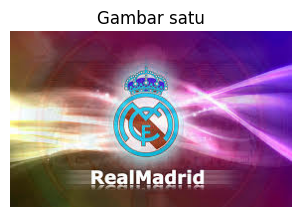

In [ ]:
# plot figure
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
plt.imshow(image_1)
plt.title("Gambar satu")
plt.axis('off')
plt.show()

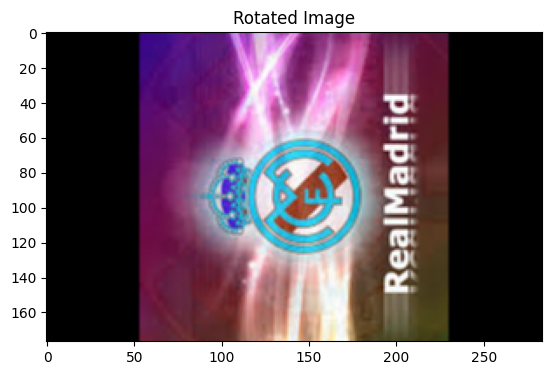

In [ ]:
# prompt: make rotation using for code image open cv

#import library
import cv2
import matplotlib.pyplot as plt

# ... (Your existing code for loading and displaying images) ...

# Rotate the image by 45 degrees clockwise
rows, cols, _ = image_1.shape #menghitung dimensi gambar
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1) #mendapatkan matriks rotasi sesuai angka
rotated_image = cv2.warpAffine(image_1, M, (cols, rows)) #menerapkan rotasi pada gambar

# menampilkan gambar yang sudah dirotasi
plt.imshow(rotated_image)
plt.title('Rotated Image')
plt.show()


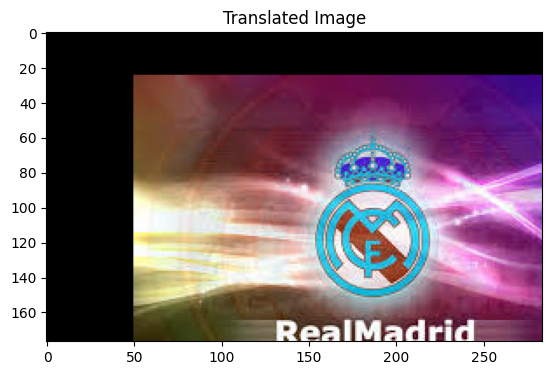

In [ ]:
# prompt: make using for code translation open cv

import urllib.request
import cv2
import matplotlib.pyplot as plt
import numpy as np

# ... (Your existing code for loading and displaying images) ...

# Example: Translate the image 50 pixels to the right and 25 pixels down
rows, cols, _ = image_1.shape #Menghitung Dimensi Gambar
M = np.float32([[1, 0, 50], [0, 1, 25]])  #Mendapatkan Matriks Translasi:
translated_image = cv2.warpAffine(image_1, M, (cols, rows)) #Menerapkan Translasi pada Gambar

# Menampilkan Gambar yang Sudah Ditranslasi
plt.imshow(translated_image)
plt.title('Translated Image')
plt.show()


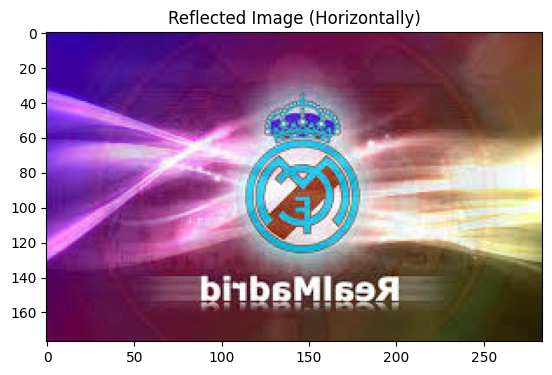

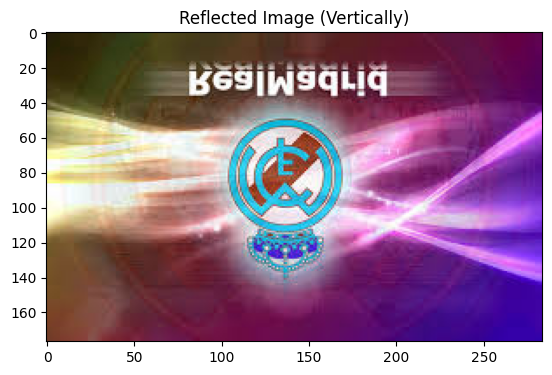

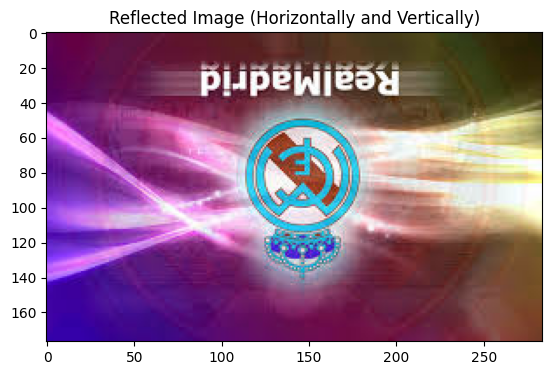

In [ ]:
# prompt: make code using for reflection

import urllib.request
import cv2 # https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html
import matplotlib.pyplot as plt
import numpy as np

# Refleksi Gambar Secara Horizontal
reflected_image = cv2.flip(image_1, 1)  # 1 for horizontal flip #Refleksi Gambar Secara Horizontal

#Menampilkan Gambar Refleksi Horizontal:
plt.imshow(reflected_image)
plt.title('Reflected Image (Horizontally)')
plt.show()

# Refleksi Gambar Secara Vertikal
reflected_image = cv2.flip(image_1, 0)  # 0 for vertical flip

# Menampilkan Gambar Refleksi Vertikal
plt.imshow(reflected_image)
plt.title('Reflected Image (Vertically)')
plt.show()

# Refleksi Gambar Secara Horizontal dan Vertikal
reflected_image = cv2.flip(image_1, -1)  # -1 for both horizontal and vertical flip

# Menampilkan Gambar Refleksi Kedua
plt.imshow(reflected_image)
plt.title('Reflected Image (Horizontally and Vertically)')
plt.show()
